#**CE-40550: Machine Learning for Bioinformatics HW3(Practical(65+10))**

Full name: Amin Ravanbakhsh

Student number: 96109725

#0.Preparation

Load your dataset using pandas then:

1.   Separate target feaure
2.   Encode categorical features
3.   Do train-test split


In [1]:
#import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d_path = '/content/drive/MyDrive/ML_for_BIO/hws/hw3/'

In [3]:
from sklearn import preprocessing

#preprocess data from yes/no to 1/0
raw_covid_data = pd.read_csv(d_path + 'Covid Dataset.csv')
covid_data = pd.DataFrame()
n = raw_covid_data.shape[0]
for col in raw_covid_data.columns:
    covid_data[col] = preprocessing.label_binarize(np.array(raw_covid_data[col]), classes = ['No', 'Yes']).reshape((n,))

# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20]
y_total = covid_data.iloc[:,20]


#SPLIT THE DATA INTO TRAIN AND TEST DATA 
#70-30 train-test splitting is enough 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_total, y_total, test_size = 0.3, random_state = 1)

#1.Dimensionality Reduction
Reduce the dimension of the data by various methods

**Note: reduced dimension resulted from all bellow  methods must be 2**

##1.PCA

In this part you must implement PCA yourself.

In [4]:
def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X

    mean_X = np.sum(X, axis=0) / X.shape[0]
    diff_X = np.array(X - mean_X)

    mean_Y = np.sum(Y, axis=0) / Y.shape[0]
    diff_Y = np.array(Y - mean_Y)

    n_samples = X.shape[0]
    covariance_matrix = (1 / n_samples) * np.matmul(diff_X.T, diff_Y)

    return covariance_matrix


class PCA:
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis. This class is also used throughout
    the project to plot data.
    """
    def __init__(self, X, n_components=2):
        self.X = X
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        
        X = self.X
        n_components = self.n_components
        
        covariance_matrix = calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = np.argsort(eigenvalues)[::-1][:n_components]
        self.eigenvalues = eigenvalues[idx]
        self.eigenvectors = eigenvectors[idx]

    def transform(self, X):
        # Project the data onto principal components
        X_transformed = np.dot(X, self.eigenvectors.T)

        # return X_transformed
        return X_transformed

Apply PCA(scikit) and your PCA on covid dataset using two components in bellow cell for later usage

In [5]:
pca = PCA(X_train, 2)
pca.fit()
X_transformed_PCA_train = pca.transform(X_train)
X_transformed_PCA_test = pca.transform(X_test)

print('shape:', X_transformed_PCA_train.shape)
print('PCA X transformed train head(5):')
X_transformed_PCA_train[:5]

shape: (3803, 2)
PCA X transformed train head(5):


array([[-0.00310953, -0.10703584],
       [-0.52950288, -0.28597429],
       [-0.29913729, -0.16389584],
       [-0.21976623, -0.69303674],
       [-0.62971726,  0.8896595 ]])

##2.t-SNE

**t-distributed Stochastic Neighbor Embedding**

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

Apply t-SNE on Covid dataset using Scikit.

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_transformed_TSNE_train = tsne.fit_transform(X_train)
X_transformed_TSNE_test = tsne.fit_transform(X_test)

print('shape:', X_transformed_TSNE_train.shape)
print('TSNE X transformed train head(5):')
X_transformed_TSNE_train[:5]

shape: (3803, 2)
TSNE X transformed train head(5):


array([[ 24.47903  ,  -2.0501192],
       [ 20.624077 , -12.857224 ],
       [-30.0048   , -59.751133 ],
       [-30.715654 , -26.43453  ],
       [-56.98627  , -12.721723 ]], dtype=float32)

##3.SVD

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.

Apply Singular Value Decomposition(SVD) on covid dataset using Scikit(TruncatedSVD).

In [7]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=10)
svd.fit(X_train)
X_transformed_SVD_train = svd.transform(X_train)
X_transformed_SVD_test = svd.transform(X_test)

print('shape:', X_transformed_SVD_train.shape)
print('SVD X transformed train head(5):')
X_transformed_SVD_train[:5]

shape: (3803, 2)
SVD X transformed train head(5):


array([[ 2.48987424, -0.72560778],
       [ 2.29913785,  0.21426442],
       [ 1.48064235,  0.01532594],
       [ 2.13892338, -0.15427248],
       [ 2.71597918, -0.64907462]])

##4.LDA

Linear Discriminant Analysis, or LDA, is a multi-class classification algorithm that can be used for dimensionality reduction.

Apply Linear Discriminant Analysis on Covid dataset using Scikit.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA().fit(X_train, y_train)
X_transformed_LDA_train = lda.transform(X_train)
X_transformed_LDA_test = lda.transform(X_test)

print('shape:', X_transformed_LDA_train.shape)
print('LDA X transformed train head(5):')
X_transformed_LDA_train[:5]

shape: (3803, 1)
LDA X transformed train head(5):


array([[ 1.52821738],
       [ 0.95423021],
       [-2.30816591],
       [-0.2197536 ],
       [ 1.61791392]])

##5.Isomap Embedding

Isomap Embedding, or Isomap, creates an embedding of the dataset and attempts to preserve the relationships in the dataset.

Apply Isomap on Covid dataset using Scikit.

In [9]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
X_transformed_Isomap_train = embedding.fit_transform(X_train)
X_transformed_Isomap_test = embedding.fit_transform(X_test)

print('shape:', X_transformed_Isomap_train.shape)
print('Isomap X transformed train head(5):')
X_transformed_Isomap_train[:5]

shape: (3803, 2)
Isomap X transformed train head(5):


array([[ 3.83951969e-02,  1.82897053e-02],
       [ 3.62138266e-02,  1.71850040e-02],
       [ 1.59900101e+01,  5.74547810e-02],
       [-5.79475036e+00, -8.99499848e-03],
       [ 3.77529792e-02,  1.79632737e-02]])

##6.Locally Linear Embedding

Locally Linear Embedding, or LLE, creates an embedding of the dataset and attempts to preserve the relationships between neighborhoods in the dataset.

Apply LLE on covid dataset using Scikit.

In [10]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

embedding = LLE(n_components=2)
X_transformed_LLE_train = embedding.fit_transform(X_train)
X_transformed_LLE_test = embedding.fit_transform(X_test)

print('shape:', X_transformed_LLE_train.shape)
print('LLE X transformed train head(5):')
X_transformed_LLE_train[:5]

shape: (3803, 2)
LLE X transformed train head(5):


array([[ 3.90815367e-08,  1.41358071e-08],
       [ 2.88167339e-08, -2.58260415e-07],
       [-6.32605842e-08, -1.72568880e-08],
       [ 6.79062549e-08, -1.07884173e-07],
       [-7.65513223e-09,  1.77674763e-08]])

##7.Modified Locally Linear Embedding

Modified Locally Linear Embedding, or Modified LLE, is an extension of Locally Linear Embedding that creates multiple weighting vectors for each neighborhood.

Apply MLLE on Covid dataset using Scikit.

In [11]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

embedding = LLE(n_components=2,method='modified', eigen_solver ='dense')
X_transformed_MLLE_train = embedding.fit_transform(X_train)
X_transformed_MLLE_test = embedding.fit_transform(X_test)

[print('#', end='') for i in range(150)]
print()
print('shape:', X_transformed_MLLE_train.shape)
print('MLLE X transformed train head(5):')
X_transformed_MLLE_train[:5]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_locally_linear.py:419: RuntimeWarning: divide by zero encountered in true_divide
  tmp[:, :nev] /= evals + reg[:, None]
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_locally_linear.py:429: RuntimeWarning: invalid value encountered in true_divide
  rho = evals[:, n_components:].sum(1) / evals[:, :n_components].sum(1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_locally_linear.py:437: RuntimeWarning: invalid value encountered in true_divide
  eta_range = evals_cumsum[:, -1:] / evals_cumsum[:, :-1] - 1
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_locally_linear.py:450: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_locally_linear.py:419: RuntimeWarning: divide by zero encountered in true_divide
  tmp[:, :nev] /= evals + reg[:, None]
/usr/local/lib/python3.7/dist-packages/sklear

######################################################################################################################################################
shape: (3803, 2)
MLLE X transformed train head(5):


array([[ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.08830891e-04,  3.95234505e-05],
       [-8.87950227e-03,  8.63900722e-03]])

##8.Kernel Principal component analysis (KPCA)

In [12]:
from sklearn.decomposition import KernelPCA as KPCA

KPCA_rbf = KPCA(n_components=2, kernel = 'rbf')
KPCA_linear = KPCA(n_components=2, kernel = 'linear')
KPCA_poly = KPCA(n_components=2, kernel = 'poly')

X_transformed_KPCA_rbf_train = KPCA_rbf.fit_transform(X_train)
X_transformed_KPCA_rbf_test = KPCA_rbf.fit_transform(X_test)

print('shape:', X_transformed_KPCA_rbf_train.shape)
print('KPCA rbf X transformed train head(5):')
print(X_transformed_KPCA_rbf_train[:5], end='\n \n')

X_transformed_KPCA_linear_train = KPCA_linear.fit_transform(X_train)
X_transformed_KPCA_linear_test = KPCA_linear.fit_transform(X_test)

print('shape:', X_transformed_KPCA_linear_train.shape)
print('KPCA linear X transformed train head(5):')
print(X_transformed_KPCA_linear_train[:5], end='\n \n')

X_transformed_KPCA_poly_train = KPCA_poly.fit_transform(X_train)
X_transformed_KPCA_poly_test = KPCA_poly.fit_transform(X_test)

print('shape:', X_transformed_KPCA_poly_train.shape)
print('KPCA poly X transformed train head(5):')
print(X_transformed_KPCA_poly_train[:5])

shape: (3803, 2)
KPCA rbf X transformed train head(5):
[[-0.20872591 -0.07087532]
 [-0.01370202  0.10461543]
 [ 0.15598164 -0.03935382]
 [ 0.0476242  -0.19854267]
 [-0.13004364 -0.17163845]]
 
shape: (3803, 2)
KPCA linear X transformed train head(5):
[[-0.84002696  0.18935858]
 [-0.08681198 -0.46002992]
 [ 0.61669714  0.22716891]
 [ 0.18096923  0.75002959]
 [-0.50488349  0.74567048]]
 
shape: (3803, 2)
KPCA poly X transformed train head(5):
[[-0.28041825 -0.2369684 ]
 [ 0.01863677  0.1738707 ]
 [ 0.41012375 -0.05121047]
 [ 0.18868323 -0.32489314]
 [-0.19284093 -0.29428816]]


##9.Univariate statistical tests

Select features according to the k highest scores.

Use SelectKBest from Scikit.

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

X_transformed_SelectKBest = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
print('shape:', X_transformed_SelectKBest.shape)
print('SelectKBest X transformed head(5):')
print(X_transformed_SelectKBest[:5])

shape: (3803, 2)
SelectKBest X transformed head(5):
[[1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]]


##10.DNN as nonlinear dimensionality reduction method((+10 points))

Autoencoder is an unsupervised artificial neural network that compresses the data to lower dimension and then reconstructs the input back. Autoencoder finds the representation of the data in a lower dimension by focusing more on the important features getting rid of noise and redundancy. It's based on Encoder-Decoder architecture, where encoder encodes the high-dimensional data to lower-dimension and decoder takes the lower-dimensional data and tries to reconstruct the original high-dimensional data.

![picture](https://drive.google.com/uc?id=1hClS6gCbW1P3Wk84KABT5k2mYiOrludQ)
![picture](https://drive.google.com/uc?id=1RTZwx4xL6zFV_nUENBgWlFKLKldPoyI-)

In the above Diagram, X is the input data, z is the lower-dimension representation of input X and X’ is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.

In this part you're gonna implement an autoencoder using Keras framework as dimensionally reduction module as explained [here](https://blog.keras.io/building-autoencoders-in-keras.html)

In [ ]:
X_train.shape

(3803, 20)

In [ ]:
import keras
from keras import layers


encoding_dim = 32
input_data = keras.Input(shape=(20,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
decoded = layers.Dense(20, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_data, decoded)
encoder = keras.Model(input_data, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

x_train = np.array(X_train)
x_test = np.array(X_test)

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_data = encoder.predict(x_test)
decoded_data = decoder.predict(encoded_data)

In [ ]:
print("raw data:")
X_test.reset_index()

raw data:


,index,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,2523,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0
1,3982,1,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0
2,3344,1,1,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0
3,4166,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0
4,206,1,1,1,1,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1627,2146,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,0,0
1628,5180,1,1,0,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0
1629,1922,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0


In [ ]:
print("data with Autoencoder")
pd.DataFrame(decoded_data, columns=X_test.columns)

data with Autoencoder


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,0.651574,0.688126,0.942729,0.812585,0.374202,0.184651,0.328357,0.754382,0.701259,0.203218,0.279189,0.387506,0.623689,0.503745,0.250764,0.220289,0.651629,0.588008,0.004778,0.024041
1,0.745410,0.753445,0.915118,0.806958,0.381914,0.640705,0.222744,0.498904,0.235107,0.243075,0.671421,0.320340,0.482411,0.779294,0.724313,0.548204,0.728783,0.479306,0.029897,0.048327
2,0.735148,0.732324,0.884830,0.713106,0.681633,0.394374,0.373922,0.519950,0.498465,0.838281,0.791107,0.665484,0.430610,0.278544,0.514573,0.347039,0.461555,0.687319,0.015473,0.040274
3,0.547494,0.809522,0.451883,0.508821,0.733630,0.657210,0.396409,0.704339,0.722720,0.748122,0.499460,0.510660,0.264050,0.466060,0.244136,0.494603,0.447850,0.248025,0.088947,0.103432
4,0.763885,0.859082,0.867439,0.806456,0.415722,0.216493,0.680415,0.638551,0.731096,0.621298,0.400047,0.594215,0.427870,0.178281,0.248779,0.270833,0.390261,0.609185,0.007744,0.019354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,0.749577,0.668246,0.538844,0.677305,0.642364,0.375810,0.381385,0.658902,0.796665,0.399578,0.361974,0.468978,0.470968,0.256909,0.267595,0.356101,0.562997,0.349128,0.032359,0.089357
1627,0.584291,0.867627,0.902237,0.791033,0.358084,0.514475,0.693060,0.399907,0.730806,0.305212,0.554572,0.610043,0.184150,0.445491,0.389651,0.443549,0.631822,0.583285,0.007779,0.013160
1628,0.857216,0.741883,0.539774,0.792802,0.645920,0.498763,0.280164,0.466377,0.378329,0.551975,0.498117,0.626415,0.682657,0.548280,0.678027,0.708062,0.591278,0.280779,0.015041,0.046901
1629,0.902528,0.765820,0.802842,0.795044,0.404981,0.377022,0.325076,0.625314,0.335920,0.330843,0.312014,0.632110,0.701100,0.365022,0.383549,0.610067,0.409220,0.538734,0.005738,0.026846


#2.Clustering

After clustering the data using either of bellow methods, evaluate your model by ground truth labels of test data.

Then plot the clusters to see how much clusters could be discriminated.

##1.Introducing k-Means

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.


###1.Implementing k-Means from scratch

In [14]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(X_df, k, no_of_iterations):

    X = np.array(X_df)
    n_sample = X.shape[0]

    idx = np.random.choice(n_sample, k, replace=False)

    #Randomly choosing Centroids 
    centroids = X[idx]
     
    #finding the distance between centroids and all the data points
    distances = cdist(X, centroids ,'euclidean') #Step 2
     
    # #Centroid with the minimum Distance
    points =  distances.argmin(axis = 1)
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            idx_k = points == idx
            temp_cent = X[idx_k].mean(axis=0)
            centroids.append(temp_cent)
 
        # centroids =  #Updated Centroids 
         
        distances = cdist(X, centroids ,'euclidean')
        points = distances.argmin(axis = 1)
         
    return points 

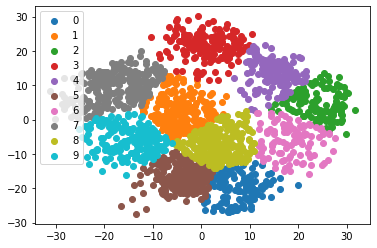

In [15]:
###Don't change this cell
#Load Data
data = load_digits().data
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
 
#Applying your function
label = kmeans(df,10,1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
###Apply kmeans from scikit to dimensionally reduced covid dataset and compare that to your implemetation and then visualize the clusters from all methods of dimensionality reduced data of above methods.
### after clustering the data, evaluate your model by ground truth labels of test data.


In [33]:
def visualize_results(df, labels, title):

    X = np.array(df)
    plt.rcParams["figure.figsize"] = (10,10)

    u_labels = np.unique(labels)
    for i in u_labels:
        idx = labels == i
        plt.scatter(X[idx, 0] , X[idx, 1] , label = i)

    plt.xlabel('feature 0')
    plt.ylabel('feature 1')
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()

from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

from sklearn import metrics
from scipy.optimize import linear_sum_assignment

def cluster_accuracy(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)

    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)

    # Return cluster accuracy
    return contingency_matrix[row_ind, col_ind].sum() / np.sum(contingency_matrix)

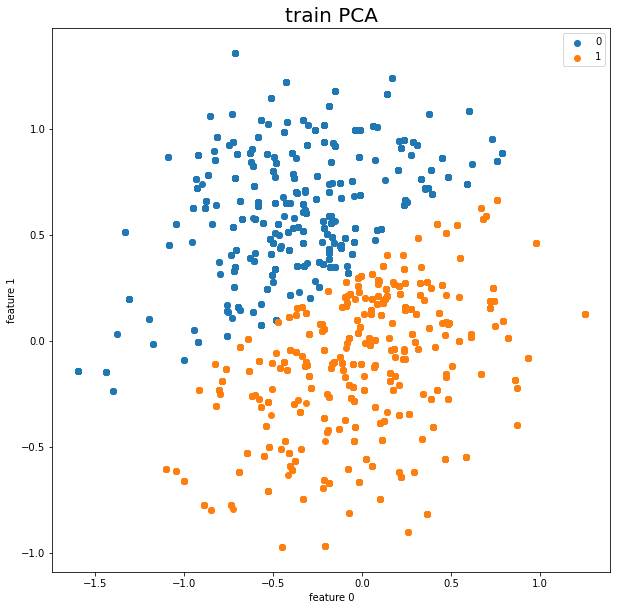

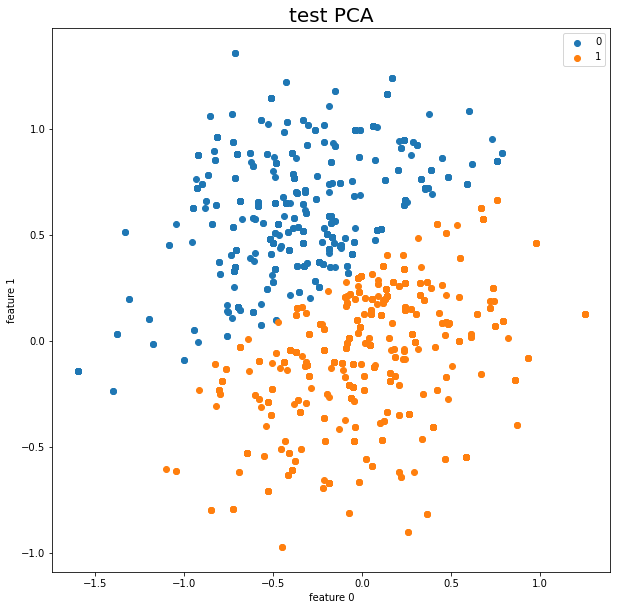


purity score pca: 0.8001226241569589


In [17]:
from sklearn.cluster import KMeans

#PCA
kmeans_pca = KMeans(n_clusters=2).fit(X_transformed_PCA_train)

kmeans_pca_train_predict = kmeans_pca.predict(X_transformed_PCA_train)
visualize_results(X_transformed_PCA_train, kmeans_pca_train_predict, 'train PCA')

kmeans_pca_test_predict = kmeans_pca.predict(X_transformed_PCA_test)
visualize_results(X_transformed_PCA_test, kmeans_pca_test_predict, 'test PCA')

print()
print('purity score pca:', purity_score(y_test, kmeans_pca_test_predict))

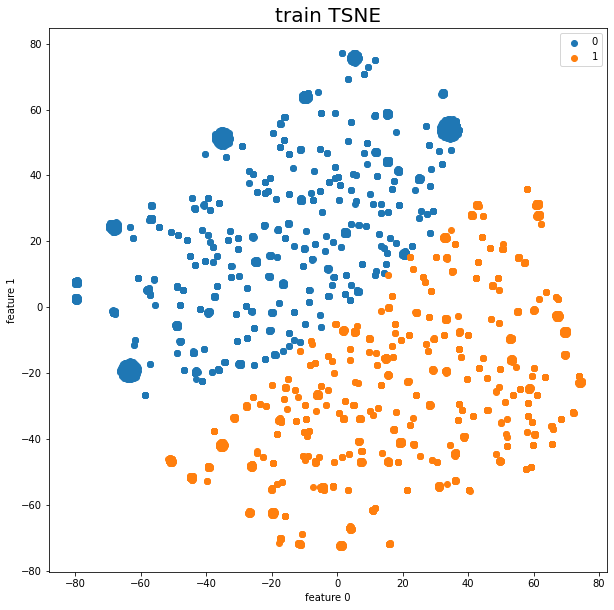

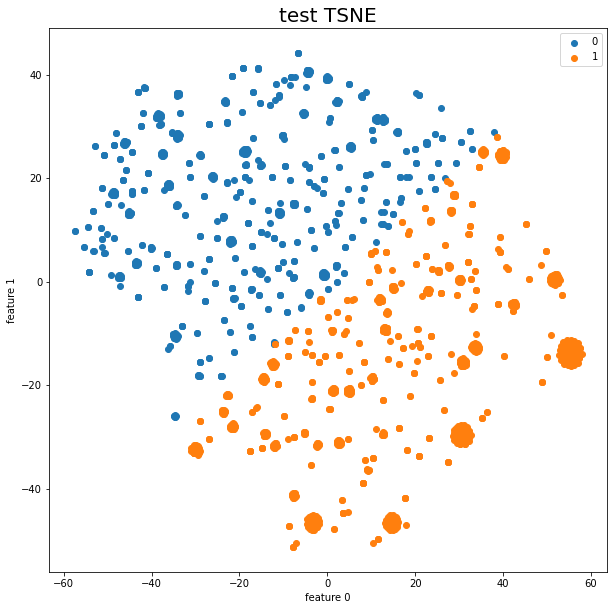


purity score TSNE: 0.8001226241569589


In [ ]:
from sklearn.cluster import KMeans

#TSNE
kmeans_TSNE = KMeans(n_clusters=2).fit(X_transformed_TSNE_train)

kmeans_TSNE_train_predict = kmeans_TSNE.predict(X_transformed_TSNE_train)
visualize_results(X_transformed_TSNE_train, kmeans_TSNE_train_predict, 'train TSNE')

kmeans_TSNE_test_predict = kmeans_TSNE.predict(X_transformed_TSNE_test)
visualize_results(X_transformed_TSNE_test, kmeans_TSNE_test_predict, 'test TSNE')

print()
print('purity score TSNE:', purity_score(y_test, kmeans_TSNE_test_predict))

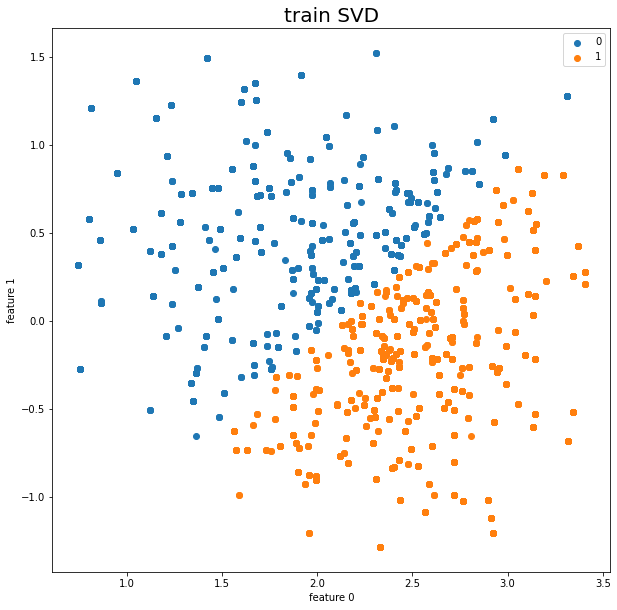

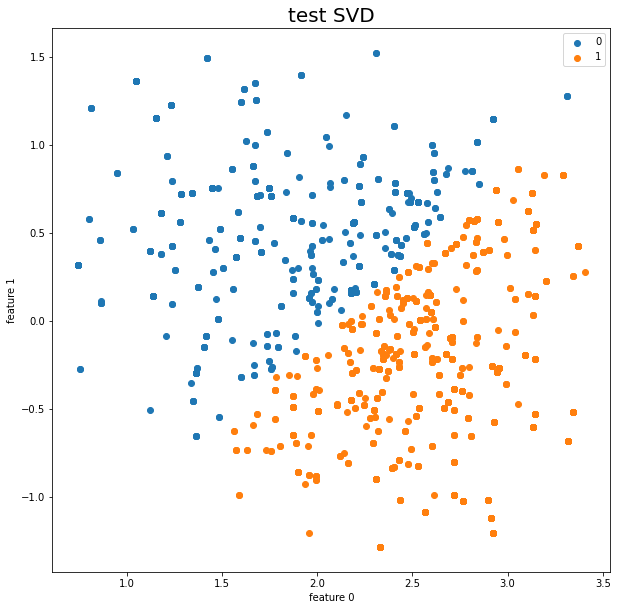


purity score SVD: 0.8142244022072348


In [18]:
from sklearn.cluster import KMeans

#SVD
kmeans_SVD = KMeans(n_clusters=2).fit(X_transformed_SVD_train)

kmeans_SVD_train_predict = kmeans_SVD.predict(X_transformed_SVD_train)
visualize_results(X_transformed_SVD_train, kmeans_SVD_train_predict, 'train SVD')

kmeans_SVD_test_predict = kmeans_SVD.predict(X_transformed_SVD_test)
visualize_results(X_transformed_SVD_test, kmeans_SVD_test_predict, 'test SVD')

print()
print('purity score SVD:', purity_score(y_test, kmeans_SVD_test_predict))

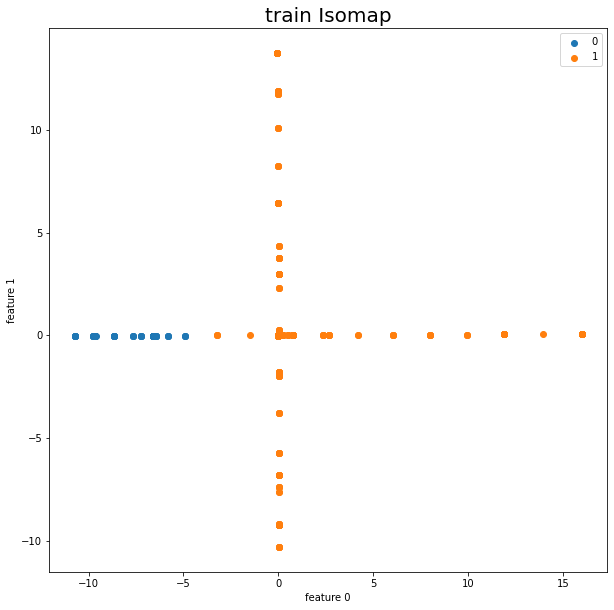

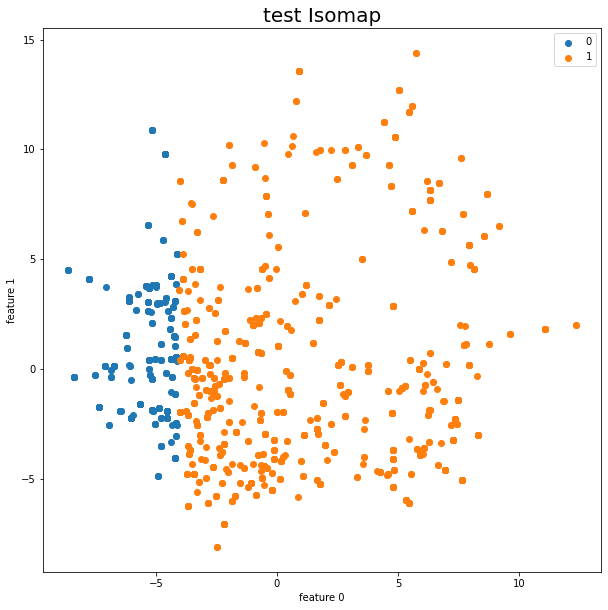


purity score Isomap: 0.8001226241569589


In [19]:
from sklearn.cluster import KMeans

#Isomap
kmeans_Isomap = KMeans(n_clusters=2).fit(X_transformed_Isomap_train)

kmeans_Isomap_train_predict = kmeans_Isomap.predict(X_transformed_Isomap_train)
visualize_results(X_transformed_Isomap_train, kmeans_Isomap_train_predict, 'train Isomap')

kmeans_Isomap_test_predict = kmeans_Isomap.predict(X_transformed_Isomap_test)
visualize_results(X_transformed_Isomap_test, kmeans_Isomap_test_predict, 'test Isomap')

print()
print('purity score Isomap:', purity_score(y_test, kmeans_Isomap_test_predict))

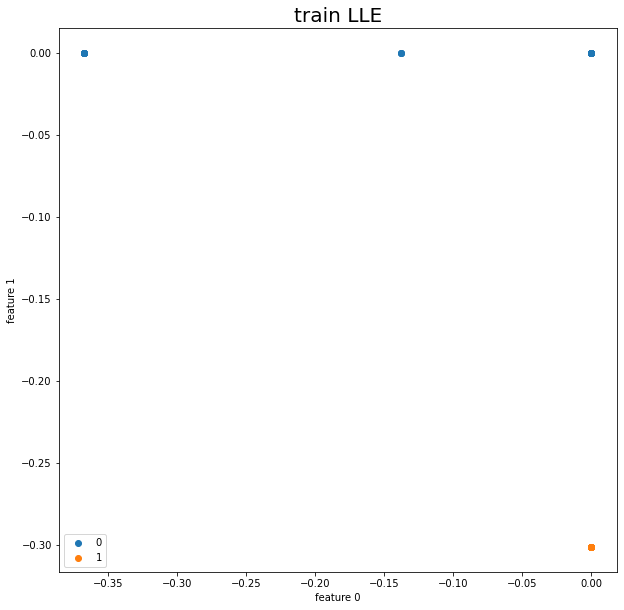

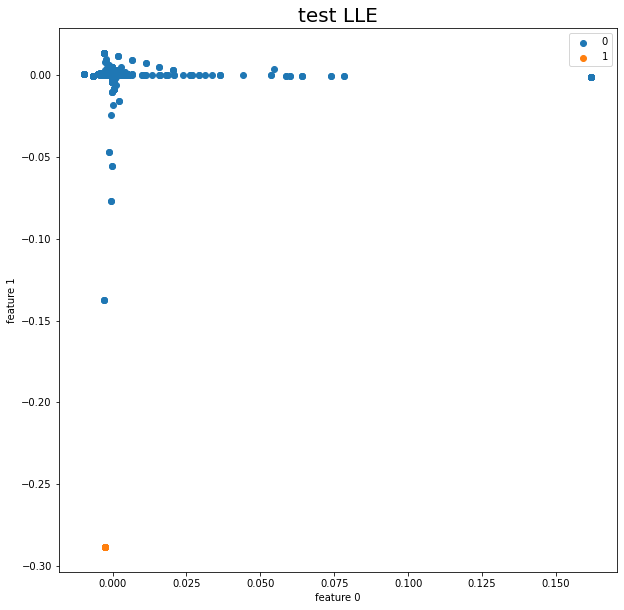


purity score LLE: 0.8001226241569589


In [20]:
from sklearn.cluster import KMeans

#LLE
kmeans_LLE = KMeans(n_clusters=2).fit(X_transformed_LLE_train)

kmeans_LLE_train_predict = kmeans_LLE.predict(X_transformed_LLE_train)
visualize_results(X_transformed_LLE_train, kmeans_LLE_train_predict, 'train LLE')

kmeans_LLE_test_predict = kmeans_LLE.predict(X_transformed_LLE_test)
visualize_results(X_transformed_LLE_test, kmeans_LLE_test_predict, 'test LLE')

print()
print('purity score LLE:', purity_score(y_test, kmeans_LLE_test_predict))

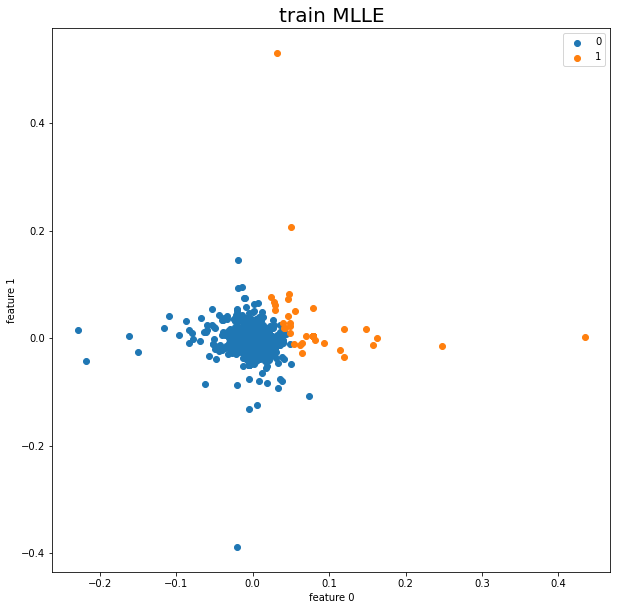

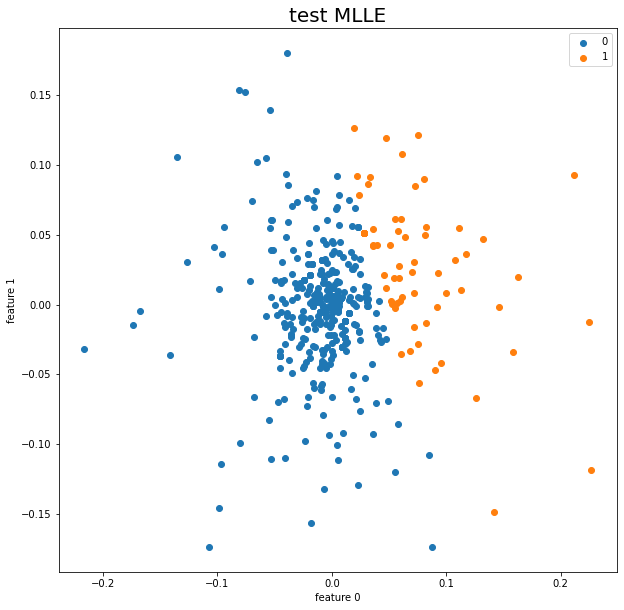


purity score MLLE: 0.8001226241569589


In [21]:
from sklearn.cluster import KMeans

#MLLE
kmeans_MLLE = KMeans(n_clusters=2).fit(X_transformed_MLLE_train)

kmeans_MLLE_train_predict = kmeans_MLLE.predict(X_transformed_MLLE_train)
visualize_results(X_transformed_MLLE_train, kmeans_MLLE_train_predict, 'train MLLE')

kmeans_MLLE_test_predict = kmeans_MLLE.predict(X_transformed_MLLE_test)
visualize_results(X_transformed_MLLE_test, kmeans_MLLE_test_predict, 'test MLLE')

print()
print('purity score MLLE:', purity_score(y_test, kmeans_MLLE_test_predict))

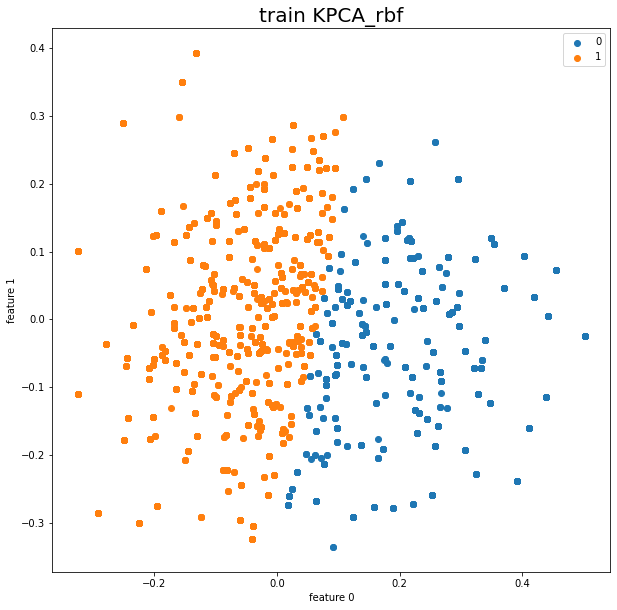

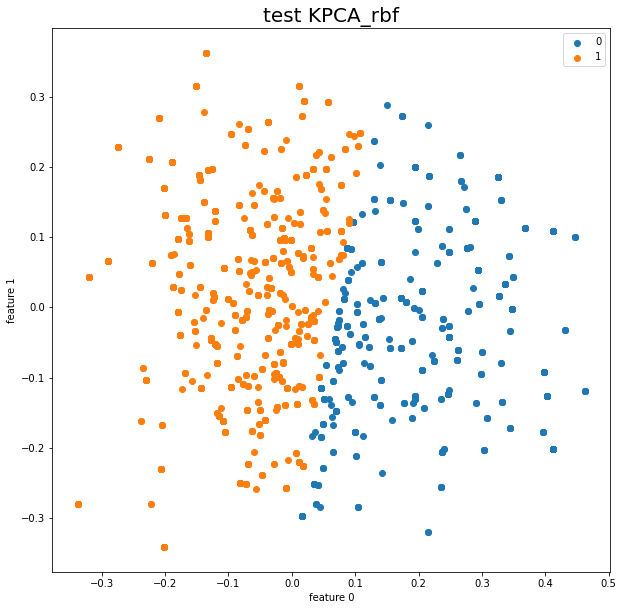


purity score KPCA_rbf: 0.8571428571428571


In [22]:
from sklearn.cluster import KMeans

#KPCA_rbf
kmeans_KPCA_rbf = KMeans(n_clusters=2).fit(X_transformed_KPCA_rbf_train)

kmeans_KPCA_rbf_train_predict = kmeans_KPCA_rbf.predict(X_transformed_KPCA_rbf_train)
visualize_results(X_transformed_KPCA_rbf_train, kmeans_KPCA_rbf_train_predict, 'train KPCA_rbf')

kmeans_KPCA_rbf_test_predict = kmeans_KPCA_rbf.predict(X_transformed_KPCA_rbf_test)
visualize_results(X_transformed_KPCA_rbf_test, kmeans_KPCA_rbf_test_predict, 'test KPCA_rbf')

print()
print('purity score KPCA_rbf:', purity_score(y_test, kmeans_KPCA_rbf_test_predict))

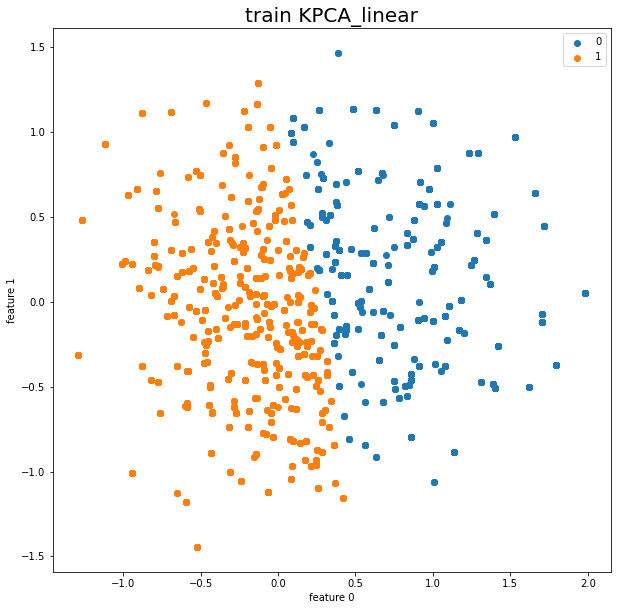

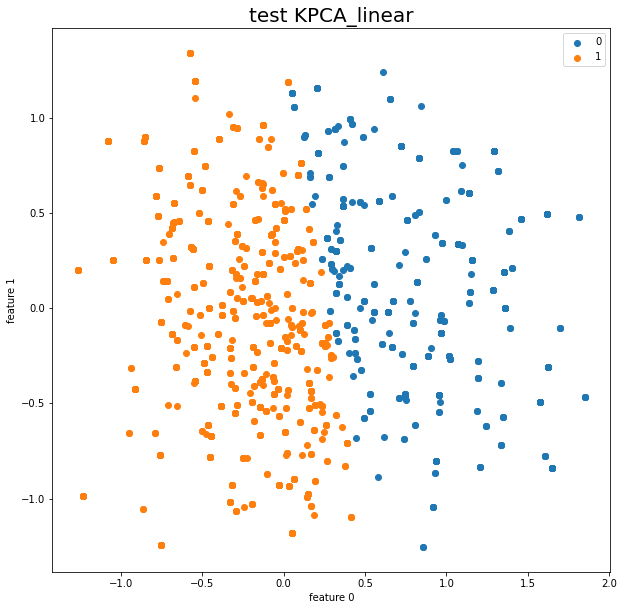


purity score KPCA_linear: 0.8749233599019006


In [23]:
from sklearn.cluster import KMeans

#KPCA_linear
kmeans_KPCA_linear = KMeans(n_clusters=2).fit(X_transformed_KPCA_linear_train)

kmeans_KPCA_linear_train_predict = kmeans_KPCA_linear.predict(X_transformed_KPCA_linear_train)
visualize_results(X_transformed_KPCA_linear_train, kmeans_KPCA_linear_train_predict, 'train KPCA_linear')

kmeans_KPCA_linear_test_predict = kmeans_KPCA_linear.predict(X_transformed_KPCA_linear_test)
visualize_results(X_transformed_KPCA_linear_test, kmeans_KPCA_linear_test_predict, 'test KPCA_linear')

print()
print('purity score KPCA_linear:', purity_score(y_test, kmeans_KPCA_linear_test_predict))

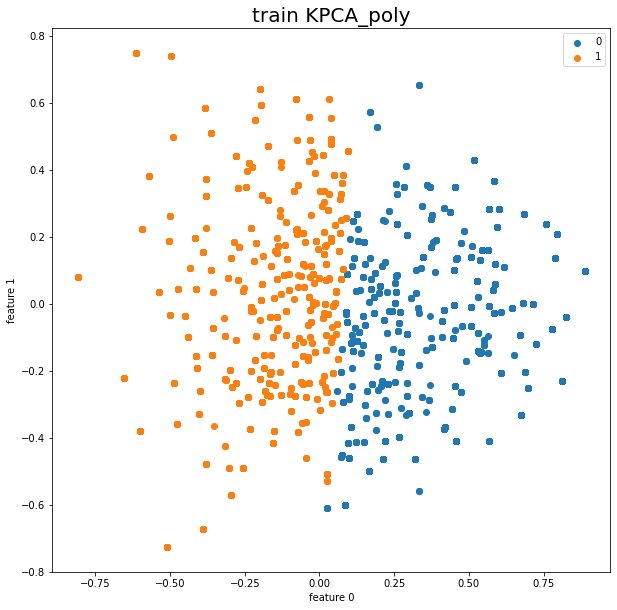

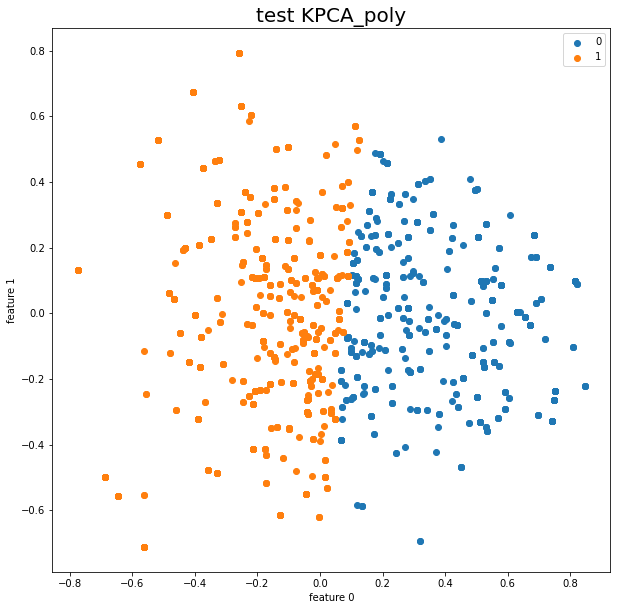


purity score KPCA_poly: 0.8001226241569589


In [24]:
from sklearn.cluster import KMeans

#KPCA_poly
kmeans_KPCA_poly = KMeans(n_clusters=2).fit(X_transformed_KPCA_poly_train)

kmeans_KPCA_poly_train_predict = kmeans_KPCA_poly.predict(X_transformed_KPCA_poly_train)
visualize_results(X_transformed_KPCA_poly_train, kmeans_KPCA_poly_train_predict, 'train KPCA_poly')

kmeans_KPCA_poly_test_predict = kmeans_KPCA_poly.predict(X_transformed_KPCA_poly_test)
visualize_results(X_transformed_KPCA_poly_test, kmeans_KPCA_poly_test_predict, 'test KPCA_poly')

print()
print('purity score KPCA_poly:', purity_score(y_test, kmeans_KPCA_poly_test_predict))

###2.k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
For the particular initialization shown here, the clusters converge in just three iterations.
Let's see it.

![picture](https://drive.google.com/uc?id=1oJrV3qmGrxV_SUk5YMKBDwRR6U0RCkzn)

In [25]:
from scipy.stats import multivariate_normal

class GMM:
    
    '''
        X: data
        k: classes number
        ps: priors
        ms: means
        cs: covs
    '''

    def init_params(self, X_df, k):
        X = np.array(X_df)
        ps = np.full((k,),1/k)
        idx = np.random.choice(X.shape[0], k, replace=False).reshape((1, k))
        ms = X[idx]
        cs = np.array([np.eye(X.shape[1]) for i in range(k)])

        return ps, ms, cs

    def predict(self, probs):
        return np.argmax(probs, axis=1)

    def E_step(self, X, k, ps, ms, cs):
        
        probs = []
        for i in range(k):
            prob_i = ps[i] * multivariate_normal.pdf(X, ms[i], cs[i])
            probs.append(prob_i)

        probs = np.array(probs)
        probs = probs.T
        z = (1/np.sum(probs, axis=1)).reshape((X.shape[0], 1))

        return probs * z

    def M_step(self, X, k, ps, ms, cs, probs):
        
        priors = np.sum(probs, axis=0)/X.shape[0]

        centers = np.zeros(ms.shape)
        for i in range(k):
            centers[i] = np.dot(probs[:, i], X)/ np.sum(probs[:, i])

        covs = np.zeros(cs.shape)
        for i in range(k):
            cov_i = 0
            for j in range(X.shape[0]):
                xm = X[j] - centers[i]
                cov_i += probs[j, i] * np.outer(xm.T, xm)
                
            covs[i] = cov_i / np.sum(probs[:, i])

        return priors, centers, covs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


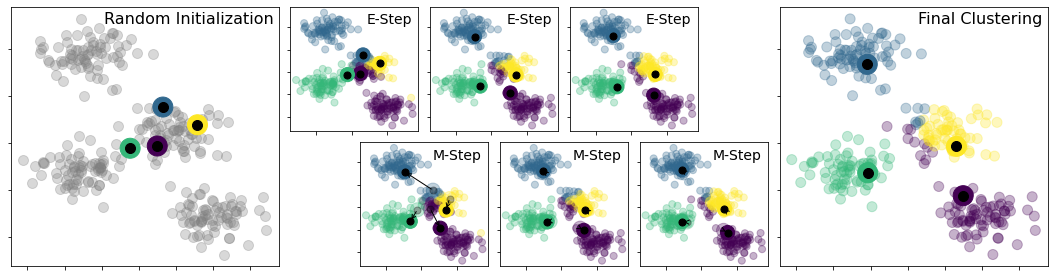

In [26]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes, ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

'''
    # iter_num = iteration numbers
    k: classes number
    centers: ms
    covars: cs
    priors: ps
'''
# iter_num = 6
k = 4
gmm = GMM()
ps, ms, cs, = gmm.init_params(X, k)
ms = centers


###TODO###
for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    probs = gmm.E_step(X, k, ps, ms, cs)
    y_pred = gmm.predict(probs)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    n_ps, n_ms, n_cs = gmm.M_step(X, k, ps, ms, cs, probs)
    new_centers = n_ms
    
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
   
    # Finish iteration
    ps, ms, cs = n_ps, n_ms, n_cs
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
# y_pred = pairwise_distances_argmin()
###TODO###


axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.show('expectation-maximization.png')

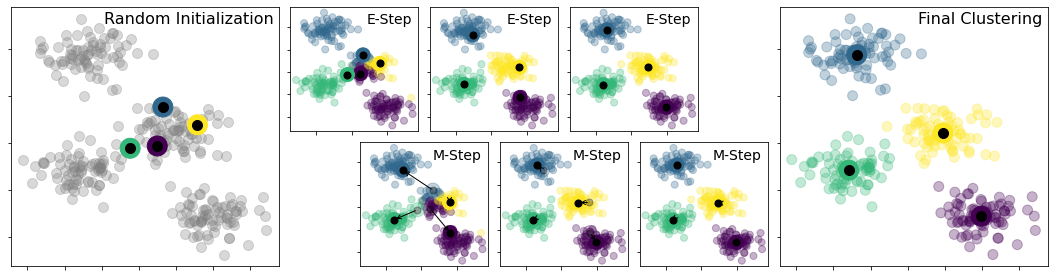

##2.DBSCAN

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, **min_samples** and **eps**, which define formally what we mean when we say dense. Higher **min_samples** or lower **eps** indicate higher density necessary to form a cluster.

In [ ]:
##Apply DBSCAN on dimensionally reduced data


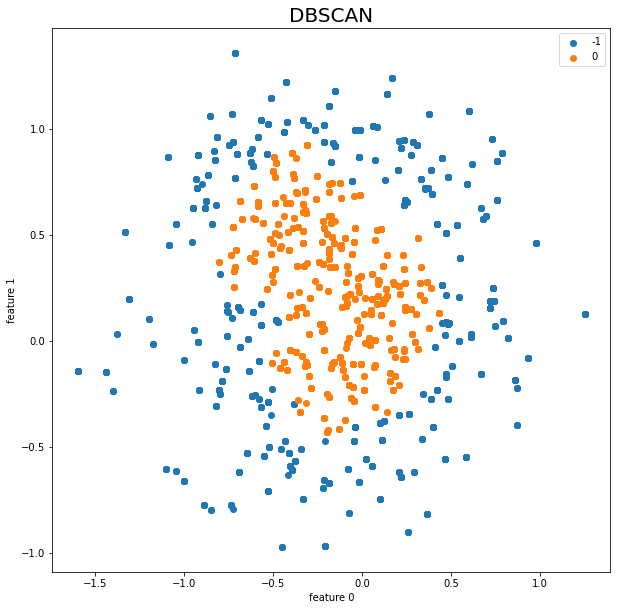

putriy of DBSCAN: 0.8001226241569589


In [29]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.18, min_samples=200).fit(X_transformed_PCA_train)
labels = clustering.labels_
visualize_results(X_transformed_PCA_train, labels, 'DBSCAN')

predict_test_DBSCAN = clustering.fit_predict(X_transformed_PCA_test)
print()
print('putriy of DBSCAN:', purity_score(y_test, predict_test_DBSCAN))
print(cluster_accuracy(y_test, predict_test_DBSCAN))

##3.Spectral clustering

SpectralClustering performs a low-dimension embedding of the affinity matrix between samples, followed by clustering, e.g., by KMeans, of the components of the eigenvectors in the low dimensional space.

In [ ]:
##Apply Specteral clustering using SpectralClustering from scikit

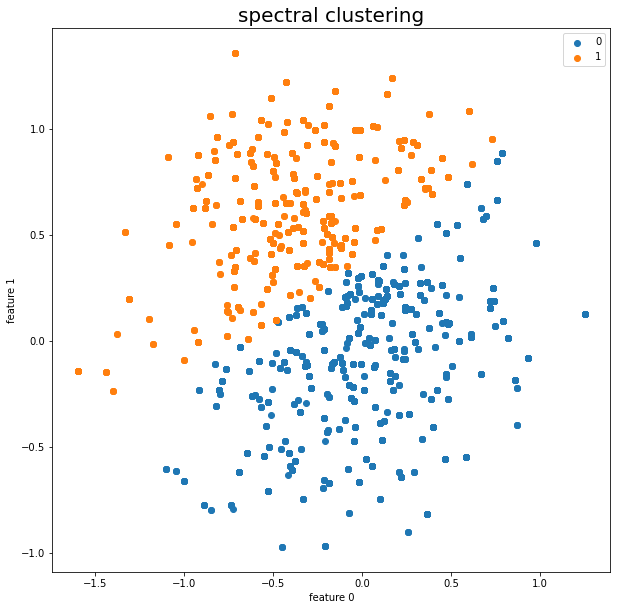


putriy of DBSCAN: 0.8001226241569589


In [31]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2).fit(X_transformed_PCA_train)
labels = clustering.labels_
visualize_results(X_transformed_PCA_train, labels, 'spectral clustering')

predict_test_Spectral_clustering = clustering.fit_predict(X_transformed_PCA_test)
print()
print('putriy of Spectral_clustering:', purity_score(y_test, predict_test_Spectral_clustering))

##4.Agglomerative clustering

A hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

In [ ]:
##Apply hierarchical clustering using AgglomerativeClustering from scikit

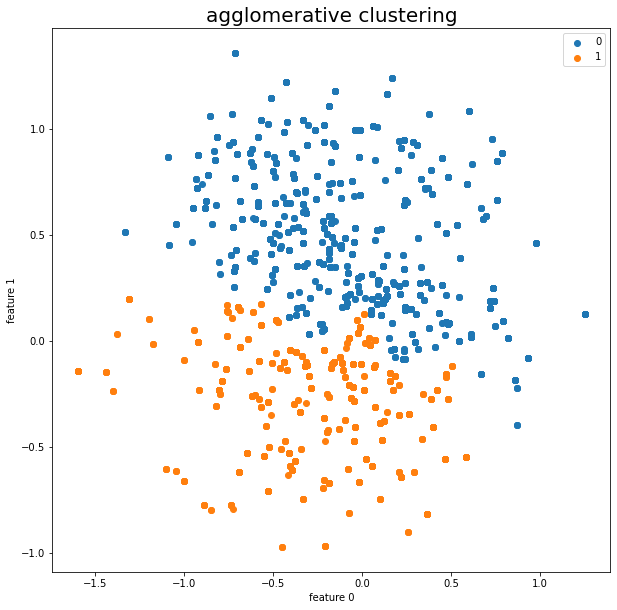

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X_transformed_PCA)
labels = clustering.labels_
visualize_results(X_transformed_PCA, labels, 'agglomerative clustering')

##5.Clustering of a high-dimensional data
We are going to do cluster analysis on a high-dimensional dateset.

The dataset is a gene expression profile of 35 samples,23 from peripheral blood/bone marrow mononuclear cells of T-PLL patients and 12 sample from different T cell types of 2 healthy donors.
T-PLL is a relatively lethal leukemia rising from anomalies in body T-cell production.T-cell is a white blood cell helping protection from infections.

For each sample there are more than 50000 expression measurements in the dataset.Each feature is a probe set that has correspondence with one or more sequences in a gene family.This information could be found by decoding the probe set id.
[More info](http://www.affymetrix.com/support/help/faqs/mouse_430/faq_8.affx)

The dataset is located at NCBI Gene Expression Omnibus.In order to retrieve and work with this database's datasets we use a python library named GEOparse.

In this section you can use any library you want.


In [ ]:
!pip install GEOparse

In [ ]:
import GEOparse as G
gse = G.get_GEO(geo="GSE147930", destdir="./")
#DATASET:  https://ncbi.xyz/geo/query/acc.cgi?acc=GSE147930  

In [ ]:
#TODO: prepare expression profile(e.g. as an Pandas.DataFrame),a table with probe sets in rows/cols and samples in cols/rows.However you want.
#Try to make it so as to be able to filter out the patient samples further in the section.
#Apply log to expression values.Its common.It makes them more meaningfully comparable.

In [ ]:
GSE_index = gse.phenotype_data.index

datas = []
for idx in GSE_index:
    datas.append(gse.gsms[idx].table['VALUE'])

GEO_df = pd.concat(datas, axis=1, keys = GSE_index)
ID_REF = gse.gsms['GSM4450396'].table['ID_REF']
GEO_df = GEO_df.T.rename(columns = ID_REF)
GEO_df = np.log2(GEO_df)
print('dataframe shape:', GEO_df.shape)
GEO_df.head()

dataframe shape: (35, 54674)


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-P1-cre-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-phe-5_at,...,1570568_at,1570569_at,1570571_at,1570572_at,1570574_at,1570575_at,1570578_at,1570579_at,1570584_at,1570585_at,1570587_at,1570588_at,1570592_a_at,1570593_at,1570594_at,1570596_at,1570597_at,1570600_at,1570601_at,1570607_at,1570618_at,1570621_at,1570622_at,1570623_at,1570624_at,1570625_at,1570627_at,1570628_at,1570629_at,1570630_at,1570631_at,1570632_at,1570633_at,1570635_at,1570639_at,1570644_at,1570645_at,1570650_at,1570651_at,1570653_at
GSM4450396,9.979651,10.415457,10.149288,11.155741,11.513912,12.612593,13.266584,14.296670,14.238271,11.432354,13.144848,13.151755,9.341266,10.321470,10.722495,9.460300,9.860546,10.170358,8.134453,10.034213,11.681086,4.027748,3.696881,3.693640,10.648979,10.793547,10.695274,11.965499,12.054018,13.684926,13.777634,14.786236,14.899871,12.155792,13.251508,13.477417,10.241987,10.256090,10.138331,9.686333,...,4.935172,6.102115,5.137637,3.948921,4.534313,3.946914,4.291347,4.349937,4.295867,5.118854,4.501041,6.249009,4.991282,4.213231,4.397217,4.865640,4.499671,5.384693,4.509894,5.685148,4.026609,4.494493,4.490590,5.010009,5.377216,5.504722,5.325839,4.051663,5.065943,5.215668,5.311984,4.354381,3.854308,4.913037,4.854654,4.851004,4.871231,4.971520,6.217030,4.328255
GSM4450397,8.039330,8.444596,8.282115,9.221968,9.662519,10.650640,11.965141,13.397137,13.563715,7.305313,10.096032,10.686551,5.733874,6.786051,7.367088,6.209179,6.872508,7.754582,5.195383,6.331699,8.471783,4.179967,3.538030,3.984508,9.043485,9.101085,9.271420,10.460869,10.653241,12.645581,12.987993,14.173598,14.399188,7.987159,10.145899,11.119867,6.529129,6.535802,6.726484,6.652772,...,4.766898,5.636109,4.613173,3.907526,3.937265,4.012553,4.166895,4.110521,3.637134,4.842349,4.572908,5.682863,4.290093,3.827737,3.647091,4.118242,4.411459,4.857048,4.263134,5.584022,3.918830,4.037931,4.160703,4.768368,4.855486,4.833857,5.081178,3.697807,4.450941,4.583069,4.399763,3.757752,3.446273,4.400474,4.017848,4.358767,4.446549,4.654782,5.773213,4.038375
GSM4450398,8.703566,9.204329,9.055700,9.909790,10.102939,11.024373,12.378417,13.569849,13.718278,7.103748,10.054169,10.913635,5.932551,7.134332,7.952051,6.226308,6.564268,8.122551,5.478110,6.539051,9.020927,4.122719,3.816613,4.544669,9.334321,9.470508,9.380844,10.550532,10.685356,12.561795,12.844863,14.072177,14.352824,7.530394,10.217986,11.264848,6.498459,7.167860,7.671053,6.188421,...,5.355558,6.265156,4.693161,4.471035,4.280216,4.009168,4.176777,4.087616,3.710094,5.861209,4.041430,5.056850,4.606453,3.926221,3.750287,4.151068,4.445422,5.136184,4.597765,5.723189,3.892376,4.124155,4.133291,4.569168,5.273676,5.526756,5.326713,3.793898,4.164620,5.054571,4.749354,4.208117,3.544851,4.729235,4.498268,4.258311,4.664450,4.967745,5.007878,4.123253
GSM4450399,8.887216,9.450169,9.159654,10.189027,10.257661,11.398712,12.679881,14.129254,14.154749,8.548447,11.284764,11.916965,6.748541,7.700204,8.691203,7.056236,7.548080,8.544132,6.243094,7.828821,9.997946,4.233867,3.709595,4.021884,9.598018,9.697692,9.483965,10.915232,10.951060,12.767184,13.229700,14.470576,14.804901,8.812070,11.540113,12.352791,7.165527,7.914579,8.444525,7.200260,...,4.754330,6.347190,5.412063,4.518289,4.501332,4.249387,4.363730,4.317910,4.200922,5.906992,4.044853,5.366812,4.639851,3.777510,4.183589,4.099890,4.702724,5.633348,4.057426,5.582452,4.105941,4.460899,4.24952

We're going to do *Class Discovery*,a common procedure in determining subtypes of the case under study.For T-PLL that appeares in different variants it helps to optimize or even customize(per patient) prognosis and treatment for the patients.

To deal with high dimensionality, select 2, 10, 50, 1000 best features in terms of **Coefficient of Variation** from the **patients** samples:

In [ ]:
#TODO

In [ ]:
from scipy.stats import variation

variations = variation(df)
best = np.argmax(variations)
best_idx = variations.argsort()[::-1]

In [ ]:
#TODO:For each of the 4 subdatasets made above run K-means algorithm for different number of cluseters(2 to 20)
#and plot the Sum of Square Error(for a sample the error is its distance^2 to its cluster center) against the number of clusters.

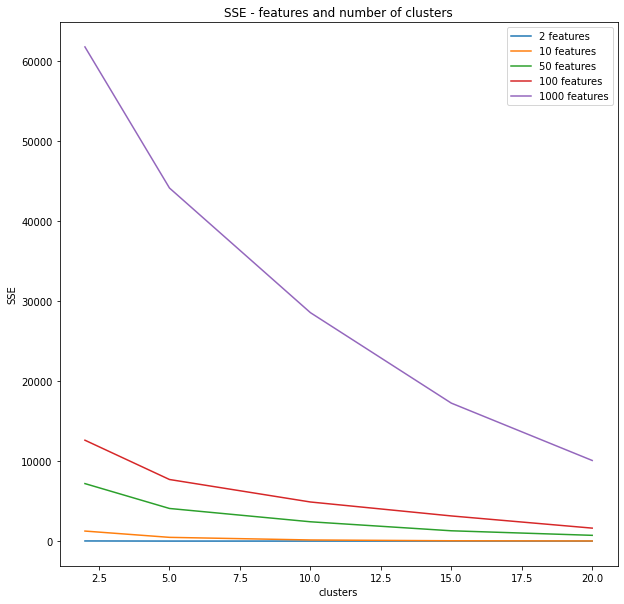

In [ ]:
from sklearn.cluster import KMeans

ns = np.array([2,10,50,100,1000])
ks = np.array([2,5,10,15,20])

for n in ns:
    SSEs = []
    for k in ks:
        X = GEO_df.iloc[:, best_idx[:n]]
        kmeans = KMeans(n_clusters=k).fit(X)
        SSEs.append(kmeans.inertia_)

    plt.plot(ks, SSEs, label = str(n) + ' features')
    
plt.title('SSE - features and number of clusters')
plt.xlabel('clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

In [ ]:
# TODO:For every subdataset plot the K-means clustering result by applying tSNE to it. Use a good k determined
# from above or plot clusters for different k's to get a better insight if you will.Select a subdataset that you
# think is better and do the rest with that.
# Note that for data with high dimension/N tSNE needs a lower perplexity(num of nearest neighbors) to work well.

In [ ]:
from sklearn.cluster import KMeans

ns = np.array([2,10,50,100,1000])
ks = np.array([2,5,10,15,20])

for n in ns:
    SSEs = []
    for k in ks:
        X = GEO_df.iloc[:, best_idx[:n]]
        kmeans = KMeans(n_clusters=k).fit(X)
        SSEs.append(kmeans.inertia_)

    plt.plot(ks, SSEs, label = str(n) + ' features')
    
plt.title('SSE - features and number of clusters')
plt.xlabel('clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

We want to identify differentially expressed genes in each cluster.To recognize them as cluster-specific genes.

In [ ]:
#For the subdataset and k that you chose , for every cluster find enriched features by subtracting
#the median expression of a feature in all other clusters from the mean expression of that feature in the cluster and selecting
#top p features.Choose p on your own.
#print the selected probe sets and plot the subdataset clustermap with features and samples hierarchically clustered
#in it.For every cluster mark its samples and its selected features in the plot.
#About clustermap you can see :https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [ ]:
#Finally using whole samples(including healthy ones), firstly select 20 best features
#based on ANOVA F-value(between feature and label(=healthy or patient)) and then plot the subdataset
#clustermap with features and samples hierarchically clustered in it.

Here is an example clustermap:

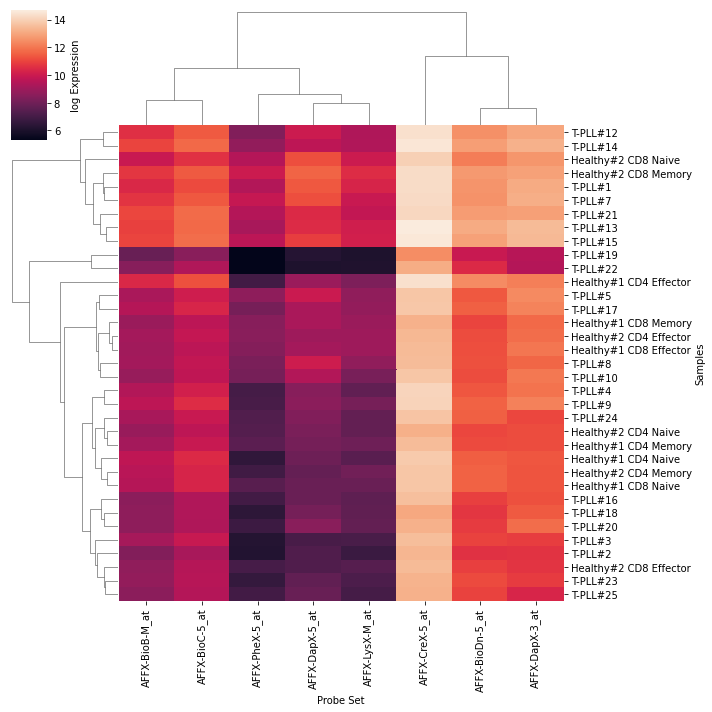

In this section the paper Zheng, G., Terry, J., Belgrader, P. et al. Massively parallel digital transcriptional profiling of single cells. Nat Commun 8, 14049 (2017). https://doi.org/10.1038/ncomms14049 is used as a reference